In [416]:
# Import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

In [410]:
# Import description dataset
data = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv", sep = ',')

In [411]:
# First view of dataset
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multico..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""value""=>""500""}, {""key""=>""Model Name"", ""value""=..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...",No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"", ""value""=>""SHUVAM20PCFTSETASSORTED""}, {""key""=>""Ide..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf415

In [412]:
# Code to display all columns and all texts
def set_pandas_display_options() -> None:
    display = pd.options.display
    display.max_columns = 20
    display.max_rows = 100
    display.max_colwidth = 300
    display.width = None
set_pandas_display_options()

In [414]:
# First view of dataset
data.head(20)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multico..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""value""=>""500""}, {""key""=>""Model Name"", ""value""=..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...",No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"", ""value""=>""SHUVAM20PCFTSETASSORTED""}, {""key""=>""Ide..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf415

In [ ]:
data['first_category'] = data['product_category_tree']

In [ ]:
for word in data['product_category_tree']:
    if word[0] == "<" and word[-1] == "'":
        print word[1:-1]

In [417]:
string = "Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester"

In [418]:
indices = [i.start() for i in re.finditer(">", string)]
print(indices)

[16, 17, 42, 43, 54, 55]


In [422]:
string[:indices[0] - 1]

'Home Furnishing'

In [437]:
index_product_category_tree = data.columns.get_loc('product_category_tree')
data['first_category'] = 0
index_first_category = data.columns.get_loc('first_category')


for index in data.index:
    indices = [i.start() for i in re.finditer(">", data.iloc[index, index_product_category_tree])]
    data.iloc[index, index_first_category] = data.iloc[index, index_product_category_tree][2:indices[0] - 1]

In [440]:
index_product_category_tree = data.columns.get_loc('product_category_tree')
data['second_category'] = 0
index_second_category = data.columns.get_loc('second_category')

for index in data.index:
    indices = [i.start() for i in re.finditer(">", data.iloc[index, index_product_category_tree])]
    data.iloc[index, index_second_category] = data.iloc[index, index_product_category_tree][indices[1] + 1:indices[2] - 1]

IndexError: list index out of range

In [438]:
data.head(50)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,first_category
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multico...",Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM"", ""value""=>""500""}, {""key""=>""Model Name"", ""value""=...",Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...",No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"", ""value""=>""SHUVAM20PCFTSETASSORTED""}, {""key""=>""Ide...",Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",B

In [381]:
# Size of dataset
data.shape

(1050, 15)

In [382]:
# dtypes of features
data.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [383]:
# Percentage of missing values for each column
data.isna().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
dtype: float64

In [384]:
# Number of missing values for each column
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [385]:
# Duplicates ?
print("duplicates in data : ", data.duplicated().sum())
print("duplicates in data['uniq_id'] : ", data.duplicated('uniq_id').sum())
print("duplicates in data['product_url'] : ", data.duplicated('product_url').sum())
print("duplicates in data['product_name'] : ", data.duplicated('product_name').sum())
print("duplicates in data['image'] : ", data.duplicated('image').sum())
print("duplicates in data['pid'] : ", data.duplicated('pid').sum())
print("duplicates in data['description'] : ", data.duplicated('description').sum())

duplicates in data :  0
duplicates in data['uniq_id'] :  0
duplicates in data['product_url'] :  0
duplicates in data['product_name'] :  0
duplicates in data['image'] :  0
duplicates in data['pid'] :  0
duplicates in data['description'] :  0


In [386]:
# Analysis of numeric features #1 : 'retail_price' & 'discounted_price'
data.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


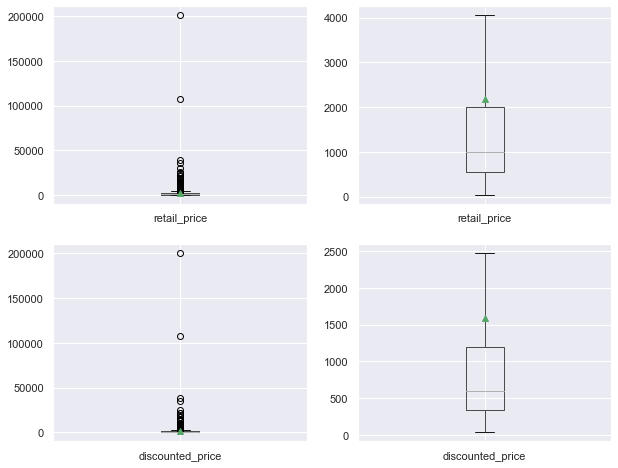

In [387]:
# Analysis of numeric features #2 : 'retail_price' & 'discounted_price'
# Boxplots with or without outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

data.boxplot(column=["retail_price"], ax=axes[0, 0], showfliers=True, showmeans=True)
data.boxplot(column=["retail_price"], ax=axes[0, 1], showfliers=False, showmeans=True)
data.boxplot(column=["discounted_price"], ax=axes[1, 0], showfliers=True, showmeans=True)
data.boxplot(column=["discounted_price"], ax=axes[1, 1], showfliers=False, showmeans=True)

plt.show()

In [388]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [389]:
# Analysis of different features

# Number of different product_category_tree
print('number of different product_category_tree =', 
      len(data['product_category_tree'].unique().tolist()))
print('-------------------------------------------')

# Number of different product_rating
print('number of different product_rating =', 
      len(data['product_rating'].unique().tolist()))
print('-------------------------------------------')
      
# Number of different overall_rating
print('number of different overall_rating =', 
      len(data['overall_rating'].unique().tolist()))
print('-------------------------------------------')

# Number of different brand
print('number of different brand =', 
      len(data['brand'].unique().tolist()))

number of different product_category_tree = 642
-------------------------------------------
number of different product_rating = 27
-------------------------------------------
number of different overall_rating = 27
-------------------------------------------
number of different brand = 491


In [390]:
# Number of products by product_rating 
data['product_rating'].value_counts().to_dict()

{'No rating available': 889,
 '5': 43,
 '4': 21,
 '3': 12,
 '1': 10,
 '4.5': 10,
 '4.3': 9,
 '3.5': 8,
 '3.7': 8,
 '2': 6,
 '4.1': 4,
 '4.2': 4,
 '4.4': 3,
 '2.3': 3,
 '4.7': 3,
 '3.6': 3,
 '3.8': 3,
 '4.8': 2,
 '2.2': 1,
 '3.9': 1,
 '3.1': 1,
 '3.3': 1,
 '2.7': 1,
 '4.9': 1,
 '3.2': 1,
 '2.5': 1,
 '1.5': 1}

In [391]:
# Number of products by overall_rating  
data['overall_rating'].value_counts().to_dict()

{'No rating available': 889,
 '5': 43,
 '4': 21,
 '3': 12,
 '1': 10,
 '4.5': 10,
 '4.3': 9,
 '3.5': 8,
 '3.7': 8,
 '2': 6,
 '4.1': 4,
 '4.2': 4,
 '4.4': 3,
 '2.3': 3,
 '4.7': 3,
 '3.6': 3,
 '3.8': 3,
 '4.8': 2,
 '2.2': 1,
 '3.9': 1,
 '3.1': 1,
 '3.3': 1,
 '2.7': 1,
 '4.9': 1,
 '3.2': 1,
 '2.5': 1,
 '1.5': 1}

-> 'product_rating' and 'overall_rating' are the same feature

In [392]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [393]:
# Filter convenient features
data = data[['uniq_id',
            'product_name',
            'product_category_tree',
            'image',
            'description']]

In [394]:
data.head()

,uniq_id,product_name,product_category_tree,image,description
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ..."
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",7b72c92c2f6c40268628ec5f14c6d590.jpg,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col..."
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",64d5d4a258243731dc7bbb1eef49ad74.jpg,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text..."
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",d4684dcdc759dd9cdf41504698d737d8.jpg,"Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor) General Brand SANTOSH ROYAL FASHION Machine Washa..."
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]",6325b6870c54cd47be6ebfbffa620ec7.jpg,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comfort. This bed sheet is hand printed. This bedsheet..."


In [395]:
# Count words in column 'description' without any cleaning
data['description'] = data['description'].astype(str)
import collections, re
pd.Series([y for x in data['description'].values.flatten() for y in x.split()]).value_counts().to_dict()

{'of': 1656,
 'and': 1167,
 'the': 1013,
 'to': 982,
 '-': 910,
 'for': 819,
 'in': 748,
 'Only': 717,
 'at': 701,
 'with': 688,
 'your': 600,
 'For': 584,
 'Rs.': 584,
 'Buy': 566,
 'Genuine': 564,
 'a': 555,
 'is': 544,
 'Replacement': 518,
 '&': 492,
 '30': 486,
 'cm': 473,
 'Day': 473,
 'On': 425,
 'Products.': 413,
 'Free': 403,
 'on': 402,
 'Shipping.': 381,
 'Cash': 381,
 'Delivery!': 381,
 'Flipkart.com.': 379,
 '1': 365,
 'from': 352,
 'Price:': 342,
 'The': 338,
 'Features': 327,
 'Guarantee.': 318,
 'Watch': 292,
 'Baby': 287,
 'In': 287,
 'General': 285,
 'Type': 281,
 'Package': 268,
 'Box': 265,
 'Sales': 261,
 'you': 257,
 'this': 254,
 'Analog': 253,
 'Number': 244,
 'Pack': 243,
 'Set': 237,
 'Cotton': 218,
 'Warranty': 217,
 'Model': 215,
 'Key': 215,
 'best': 213,
 'Material': 212,
 'It': 207,
 'Color': 206,
 'Brand': 204,
 'Showpiece': 198,
 'it': 198,
 'are': 191,
 'Details': 188,
 'be': 188,
 'Ceramic': 183,
 'shipping': 183,
 'online.': 183,
 'cash': 183,
 'deliv

In [396]:
# List of useless and frequent words in 'description' column
list_sw = ['only', 'products', 'free', 'for', 'buy', 'delivery', 
           'cash', 'shipping', 'genuine', 'replacement', 'day', 
           'flipkart', 'com', 'guarantee', 'online', 'features', 
           'specifications', 'the', 'price', 'color', 'type', 
           'general', 'sales', 'quality', 'best', 'brand', 
           'prices', 'this', 'made', 'great', 'perfect', 'size', 
           'dimensions', 'ideal', 'and', 'with', 'also', 'yes', 
           'these', 'you', 'our', 'all', 'please', 'your', 'well', 
           'each', 'yet']

## Cleaning of the text in column 'description'

In [406]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ').replace('.', ' . ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
nltk.download('stopwords')
# Combining list of usual stopwords in english, list of useless and frequent words in this case and punctuation
stop_w = list(set(stopwords.words('english'))) + list_sw + ['[', ']', ',', '.', ':', '?', '(', ')', '!']

def stop_word_filter_fct(list_words) :
    # First filter : delete words in stop_w
    filtered_w = [w for w in list_words if not w in stop_w]
    # Second filter : delete words of 1 or 2 caracters
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

from collections import Counter
# Remove duplicated word in the same sentence
def remov_duplicates(input):
    # split input string separated by space
    input = input.split(" ")
    # now create dictionary using counter method
    # which will have strings as key and their
    # frequencies as value
    UniqW = Counter(input)
    # joins two adjacent elements in iterable way
    s = " ".join(UniqW.keys())
    return s

# Remove digits from words in list
def remove(input):
    # using join and isdigit 
    # to remove numeric digits from string
    res = ''.join([i for i in input if not i.isdigit()])
    return res

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)
    # Remove extra spaces, tabs, and line breaks
    transf_desc_text = ' '.join(sw)
    # Remove numbers
    transf_desc_text = re.sub(r"\b[0-9]+\b\s*", "", transf_desc_text)
    # Remove digits from words
    transf_desc_text = remove(transf_desc_text)
    # Remove duplicated word in the same sentence
    transf_desc_text = remov_duplicates(transf_desc_text)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)
    lem_w = lemma_fct(sw)
    # Remove extra spaces, tabs, and line breaks
    transf_desc_text = ' '.join(lem_w)
    # Remove numbers
    transf_desc_text = re.sub(r"\b[0-9]+\b\s*", "", transf_desc_text)
    # Remove digits from words
    transf_desc_text = remove(transf_desc_text)
    # Remove duplicated word in the same sentence
    transf_desc_text = remov_duplicates(transf_desc_text)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\33624\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\33624\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [407]:
data['description_bow'] = data['description'].apply(lambda x : transform_bow_fct(x))
data['description_bow_lem'] = data['description'].apply(lambda x : transform_bow_lem_fct(x))
data.shape

(1050, 7)

In [408]:
data

,uniq_id,product_name,product_category_tree,image,description,description_bow,description_bow_lem
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",key elegance polyester multicolor abstract eyelet door curtain floral height pack enhances look interiors high fabric style stitch metal ring makes room environment romantic loving ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs surreal attention sure ste...,key elegance polyester multicolor abstract eyelet door curtain floral height pack enhances look interior high fabric style stitch metal ring make room environment romantic loving ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design surreal attention sure steal ...
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",7b72c92c2f6c40268628ec5f14c6d590.jpg,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...",sathiyas cotton bath towel red yellow blue machine washable material design self gsm model name men women boys girls asvtwl mediam length inch width box number contents package,sathiyas cotton bath towel red yellow blue machine washable material design self gsm model name men woman boy girl asvtwl mediam length inch width box number content package
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",64d5d4a258243731dc7bbb1eef49ad74.jpg,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...",key eurospa cotton terry face towel set small height inch gsm piece assorted brings exclusively designed soft towels export texture takes care skin gives enriched feeling deserve exporting bath lot renowned brands last years famous fine prints absorbency softness durability note product suscepti...,key eurospa cotton terry face towel set small height inch gsm piece assorted brings exclusively designed soft export texture take care skin give enriched feeling deserve exporting bath lot renowned brand last year famous fine print absorbency softness durability note product susceptible shrinkag...
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",d4684dcdc759dd9cdf41504698d737d8.jpg,"Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor) General Brand SANTOSH ROYAL FASHION Machine Washa...","key santosh royal fashion cotton printed king sized double bedsheet perfact wedding gifting bedsheet,pillow cover multicolor mac

In [374]:
# Count words in column 'description_bow' without any cleaning
data['description_bow'] = data['description_bow'].astype(str)
import collections, re
dict = pd.Series([y for x in data['description_bow'].values.flatten() for y in x.split()]).value_counts().to_dict()
dict

{'box': 250,
 'package': 218,
 'number': 218,
 'pack': 207,
 'material': 205,
 'key': 201,
 'india': 162,
 'set': 159,
 'watch': 153,
 'model': 149,
 'contents': 142,
 'design': 134,
 'discounts': 134,
 'analog': 131,
 'cotton': 128,
 'fabric': 116,
 'details': 111,
 'pattern': 104,
 'showpiece': 102,
 'water': 100,
 'width': 98,
 'care': 98,
 'baby': 98,
 'name': 97,
 'combo': 96,
 'product': 88,
 'men': 88,
 'height': 88,
 'multicolor': 87,
 'weight': 85,
 'additional': 84,
 'style': 83,
 'ceramic': 82,
 'home': 81,
 'round': 79,
 'women': 78,
 'wash': 78,
 'gift': 77,
 'use': 75,
 'mug': 75,
 'black': 73,
 'resistant': 73,
 'length': 70,
 'printed': 69,
 'body': 67,
 'strap': 67,
 'dial': 67,
 'inch': 64,
 'high': 64,
 'blue': 62,
 'code': 60,
 'warranty': 60,
 'casual': 59,
 'occasion': 59,
 'girl': 55,
 'boys': 54,
 'depth': 54,
 'designed': 54,
 'give': 53,
 'easy': 53,
 'cover': 53,
 'girls': 52,
 'safe': 50,
 'soft': 49,
 'light': 49,
 'laptop': 49,
 'like': 48,
 'single': 48,


In [138]:
# fonction pour retourner la clé pour n'importe quelle valeur
list_sw = []
def find_key(v): 
    for k, val in dict.items(): 
        if val > v:
            list_sw.append(k)
    return list_sw

In [139]:
print(find_key(350))

['only', 'products', 'free', 'for', 'buy', 'delivery', 'cash', 'shipping', 'genuine', 'replacement', 'day', 'flipkart', 'com', 'guarantee', 'online', 'features', 'specifications', 'the', 'price']


In [140]:
list_sw.extend(['color', 'type', 'general', 'sales', 'quality', 'best', 'brand',
              'prices', 'this', 'made', 'great', 'perfect', 'size', 'dimensions',
              'ideal', 'and', 'with', 'also', 'yes', 'these', 'you', 'our', 'all',
              'please', 'your', 'well', 'each', 'yet'])

In [141]:
print(list_sw)

['only', 'products', 'free', 'for', 'buy', 'delivery', 'cash', 'shipping', 'genuine', 'replacement', 'day', 'flipkart', 'com', 'guarantee', 'online', 'features', 'specifications', 'the', 'price', 'color', 'type', 'general', 'sales', 'quality', 'best', 'brand', 'prices', 'this', 'made', 'great', 'perfect', 'size', 'dimensions', 'ideal', 'and', 'with', 'also', 'yes', 'these', 'you', 'our', 'all', 'please', 'your', 'well', 'each', 'yet']


In [142]:
stop_w.extend(list_sw)

In [143]:
stop_w

['between',
 'because',
 'own',
 'which',
 'am',
 'should',
 'when',
 'themselves',
 'his',
 'do',
 'from',
 'yourself',
 'now',
 "you'd",
 'while',
 'ourselves',
 'above',
 "you've",
 'itself',
 'these',
 'into',
 'my',
 'its',
 'been',
 'o',
 "isn't",
 'so',
 'before',
 'being',
 'doing',
 "didn't",
 "wouldn't",
 'after',
 'there',
 'y',
 'and',
 'she',
 'or',
 'he',
 'up',
 "don't",
 'then',
 'won',
 "you'll",
 'him',
 'through',
 'their',
 'down',
 'at',
 'very',
 'how',
 'is',
 'against',
 'll',
 'couldn',
 'can',
 "that'll",
 'doesn',
 'haven',
 'again',
 'her',
 'some',
 'be',
 'you',
 'don',
 'were',
 'only',
 'than',
 "won't",
 'our',
 "couldn't",
 'did',
 'yours',
 'yourselves',
 'an',
 'the',
 'm',
 'had',
 "mustn't",
 'ours',
 'himself',
 'who',
 'mustn',
 've',
 'below',
 "haven't",
 'no',
 'those',
 'have',
 'has',
 'what',
 'why',
 're',
 'weren',
 'but',
 'this',
 'was',
 'by',
 'to',
 'more',
 'does',
 'during',
 'too',
 'needn',
 'they',
 'not',
 'just',
 'as',
 'hers

In [147]:
data['description_bow'] = data['description'].apply(lambda x : transform_bow_fct(x))
data['description_bow_lem'] = data['description'].apply(lambda x : transform_bow_lem_fct(x))
data.shape

(1050, 7)

In [148]:
data

,uniq_id,product_name,product_category_tree,image,description,description_bow,description_bow_lem
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",55b85ea15a1536d46b7190ad6fff8ce7.jpg,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...",key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interiors this curtain 100 high polyester fabric eyelet style stitch metal ring makes room enviro...,key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 height pack price 899 this curtain enhances look interior this curtain 100 high polyester fabric eyelet style stitch metal ring make room environme...
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",7b72c92c2f6c40268628ec5f14c6d590.jpg,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...",specifications sathiyas cotton bath towel bath towel red yellow blue bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal for men women boys girls model asvtwl322 color red yellow bl...,specification sathiyas cotton bath towel bath towel red yellow blue bath towel feature machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal for men woman boy girl model asvtwl322 color red yellow blue s...
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",64d5d4a258243731dc7bbb1eef49ad74.jpg,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...",key features eurospa cotton terry face towel set size small height inch gsm 360 eurospa cotton terry face towel set piece face towel set assorted price 299 eurospa brings exclusively designed 100 soft cotton towels export all soft texture takes care skin gives enriched feeling deserve eurospa ex...,key feature eurospa cotton terry face towel set size small height inch gsm 360 eurospa cotton terry face towel set piece face towel set assorted price 299 eurospa brings exclusively designed 100 soft cotton towel export all soft texture take care skin give enriched feeling deserve eurospa export...
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",d4684dcdc759dd9cdf41504698d737d8.jpg,"Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed K

In [149]:
list_sw

['only',
 'products',
 'free',
 'for',
 'buy',
 'delivery',
 'cash',
 'shipping',
 'genuine',
 'replacement',
 'day',
 'flipkart',
 'com',
 'guarantee',
 'online',
 'features',
 'specifications',
 'the',
 'price',
 'color',
 'type',
 'general',
 'sales',
 'quality',
 'best',
 'brand',
 'prices',
 'this',
 'made',
 'great',
 'perfect',
 'size',
 'dimensions',
 'ideal',
 'and',
 'with',
 'also',
 'yes',
 'these',
 'you',
 'our',
 'all',
 'please',
 'your',
 'well',
 'each',
 'yet']

In [415]:
import re

text = "hello, i like to eat beef 'sandwiches' and beef 'jerky' and chicken 'patties' and chicken 'burgers' and also chicken 'fingers' and other chicken 'meat' too."

match = re.findall(r'chicken \'(\S+)\'', text)
print (match)

['patties', 'burgers', 'fingers', 'meat']
